In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e3/sample_submission.csv
/kaggle/input/playground-series-s3e3/train.csv
/kaggle/input/playground-series-s3e3/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e3/test.csv')

In [3]:
train.head(50)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
5,5,27,Travel_Rarely,566,Research & Development,2,3,Other,1,3,...,80,0,6,0,3,1,0,1,0,0
6,6,34,Travel_Rarely,944,Research & Development,10,4,Medical,1,2,...,80,0,1,2,3,1,0,0,0,0
7,7,40,Travel_Rarely,1009,Research & Development,2,3,Life Sciences,1,4,...,80,1,6,3,2,3,2,1,2,0
8,8,51,Travel_Frequently,1297,Sales,6,3,Life Sciences,1,4,...,80,1,18,3,3,16,14,4,9,0
9,9,25,Travel_Rarely,806,Research & Development,9,1,Medical,1,3,...,80,1,9,2,2,9,7,7,8,0


In [4]:
train.shape

(1677, 35)

In [5]:
train.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [8]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for column in categorical_columns:
    unique_values = train[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'BusinessTravel': ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Column 'Department': ['Research & Development' 'Sales' 'Human Resources']
Column 'EducationField': ['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Column 'Gender': ['Male' 'Female']
Column 'JobRole': ['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
Column 'MaritalStatus': ['Married' 'Divorced' 'Single']
Column 'Over18': ['Y']
Column 'OverTime': ['Yes' 'No']


## EDA

In [9]:
import matplotlib.pyplot as plt

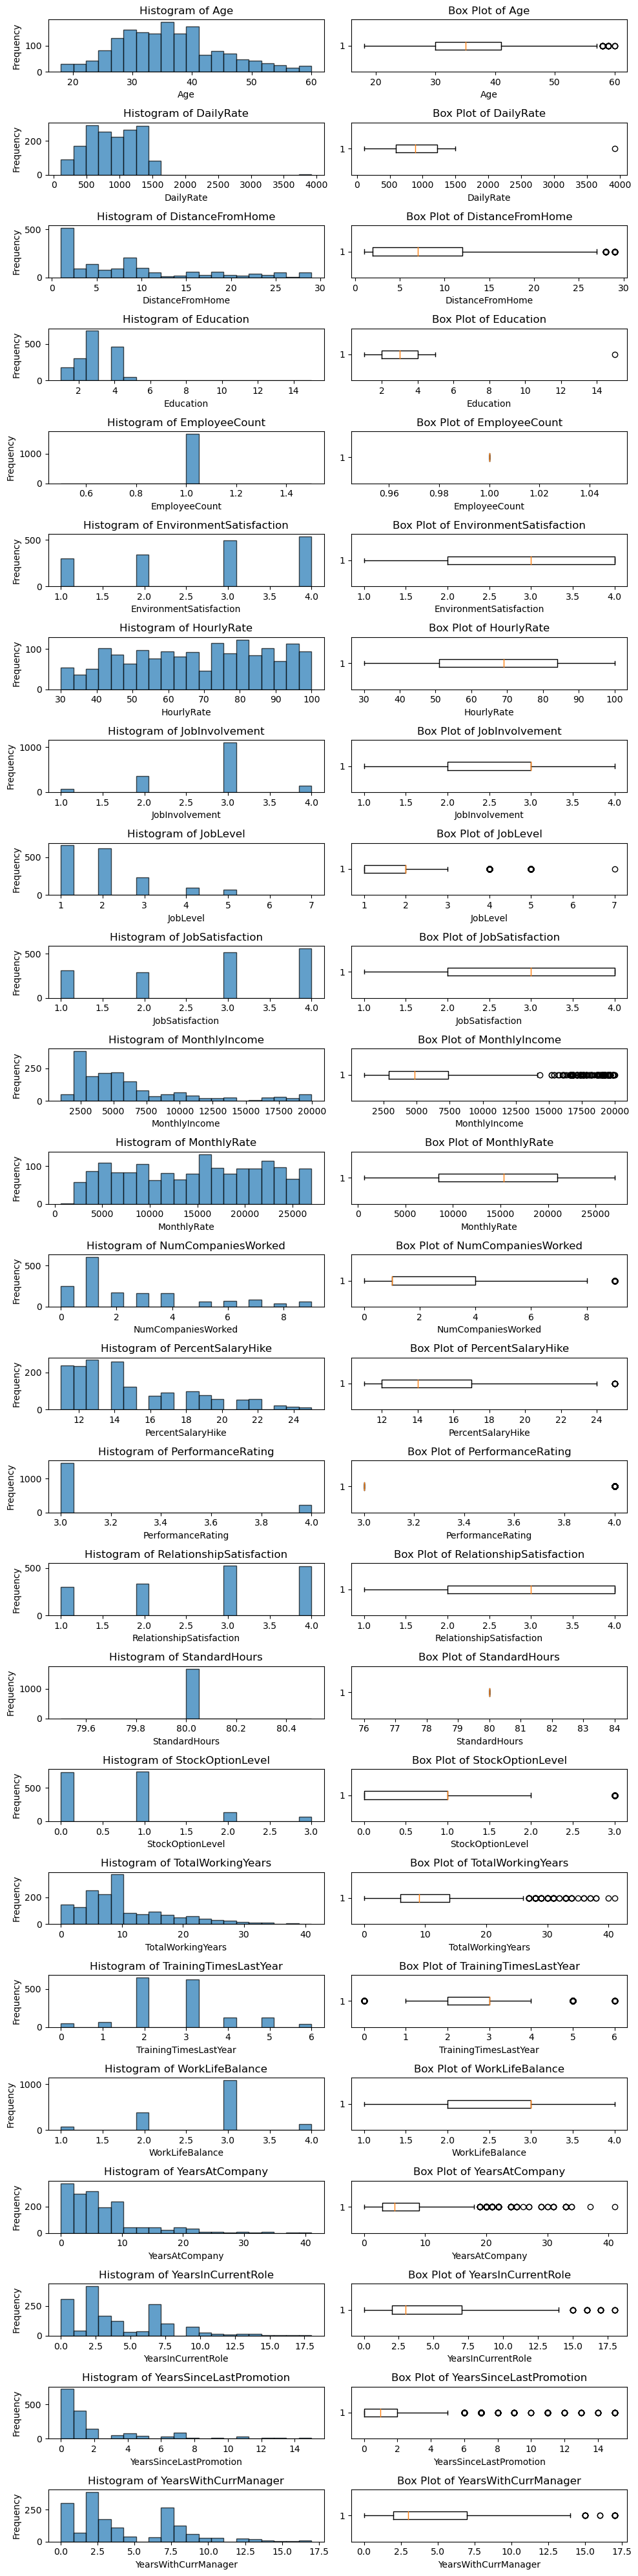

In [10]:


numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(10, 40))

for i, column in enumerate(numerical_columns):
    # Histogram
    axes[i, 0].hist(train[column], bins=20, edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    axes[i, 1].boxplot(train[column], vert=False)
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


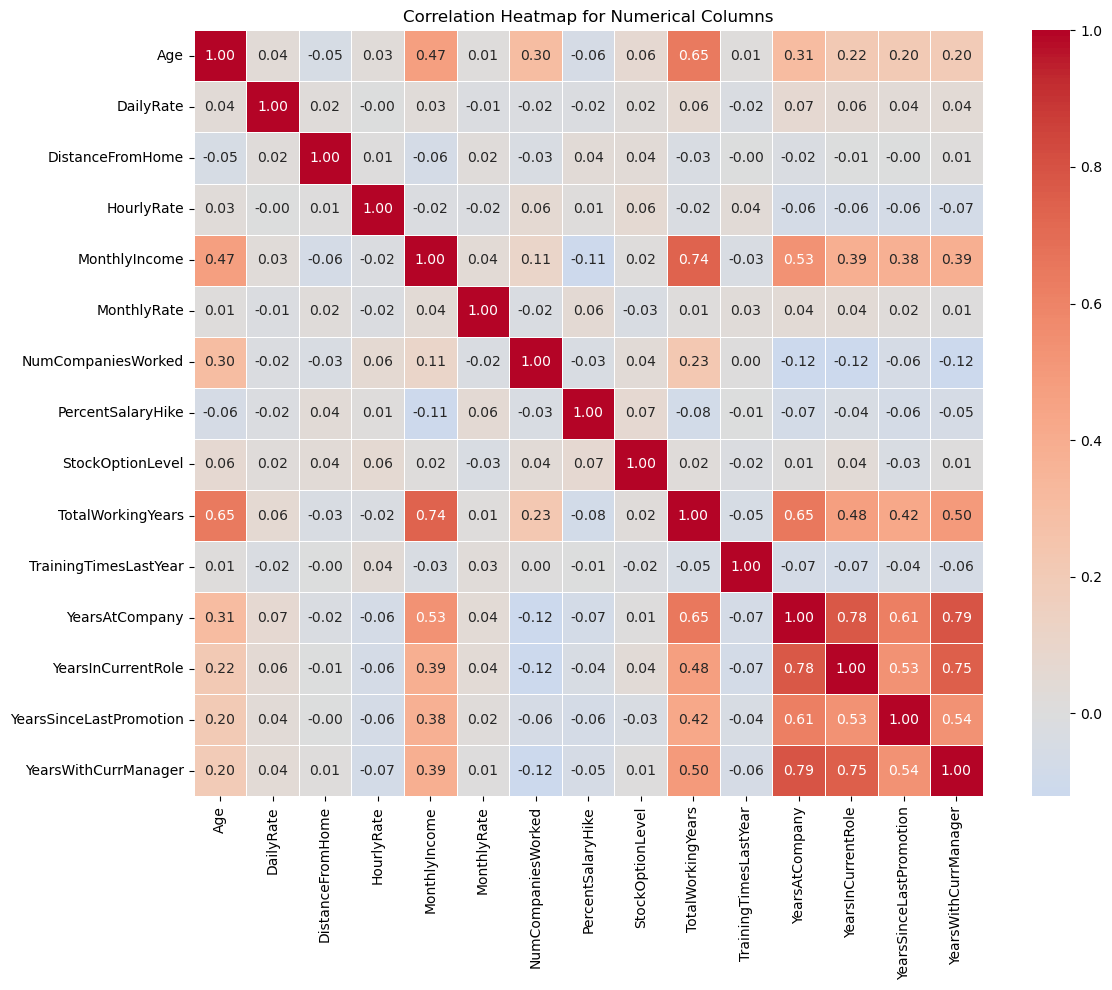

In [11]:

import seaborn as sns


numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome' ,  'HourlyRate',  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

numerical_data = train[numerical_columns]

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Set up the figure and axes
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn with adjusted layout
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)

plt.title("Correlation Heatmap for Numerical Columns")
plt.tight_layout()
plt.show()

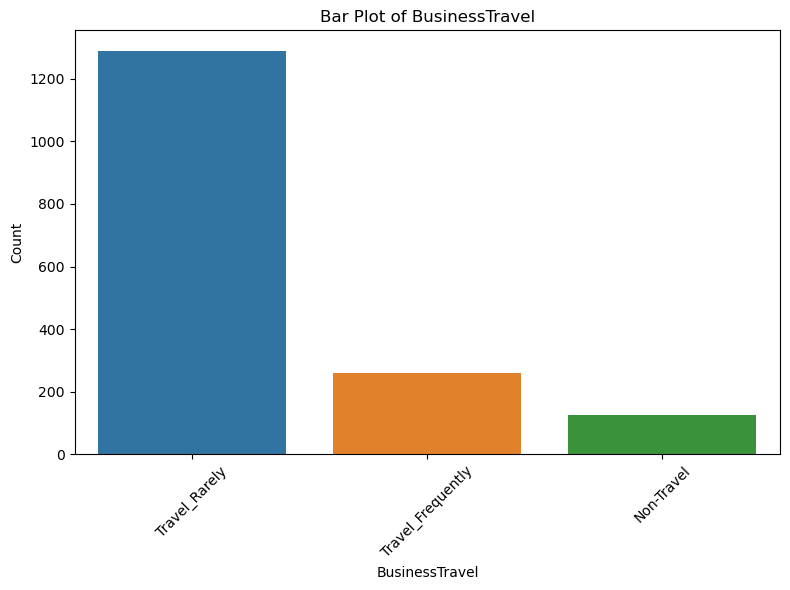

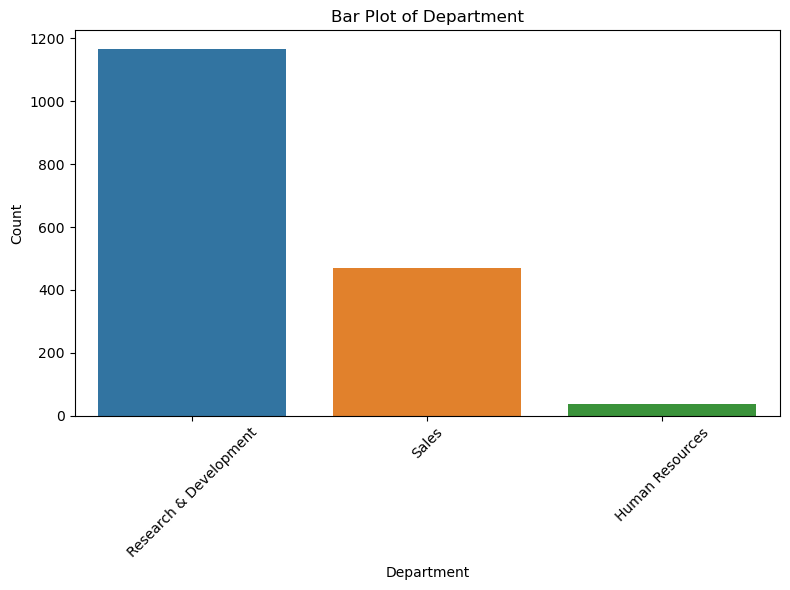

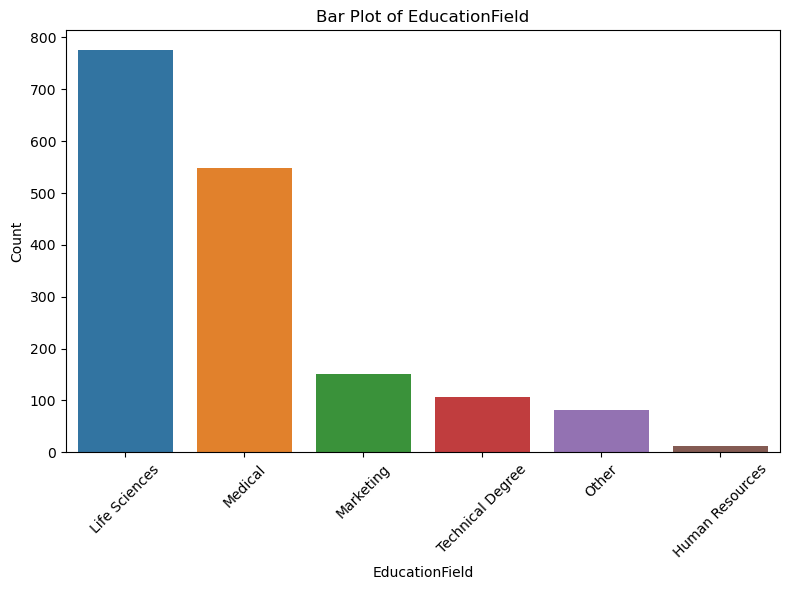

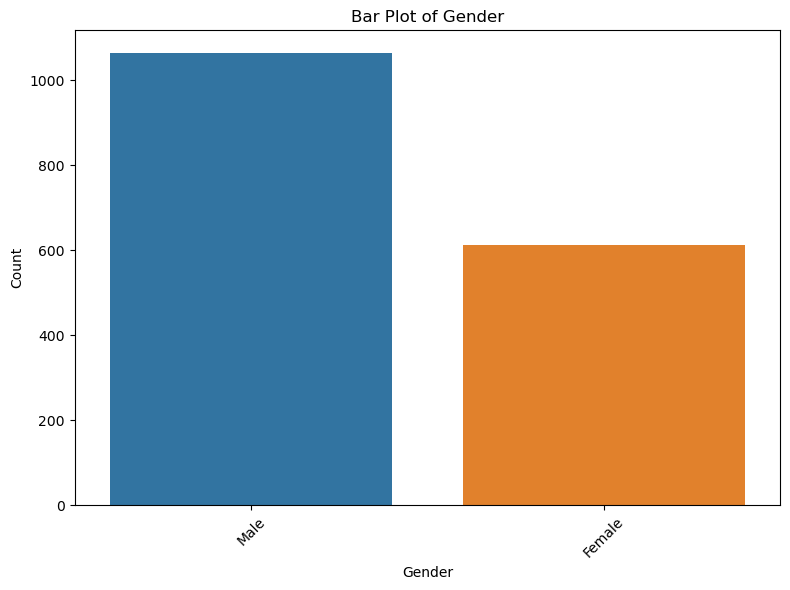

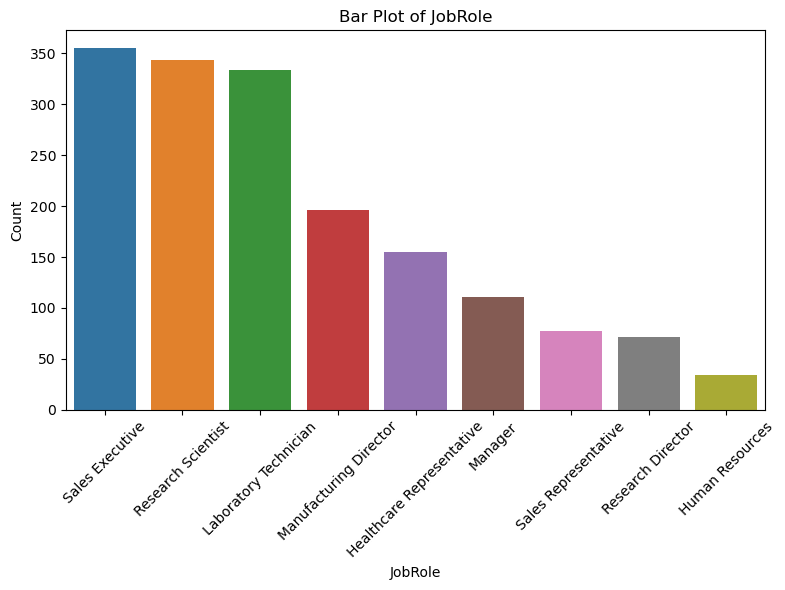

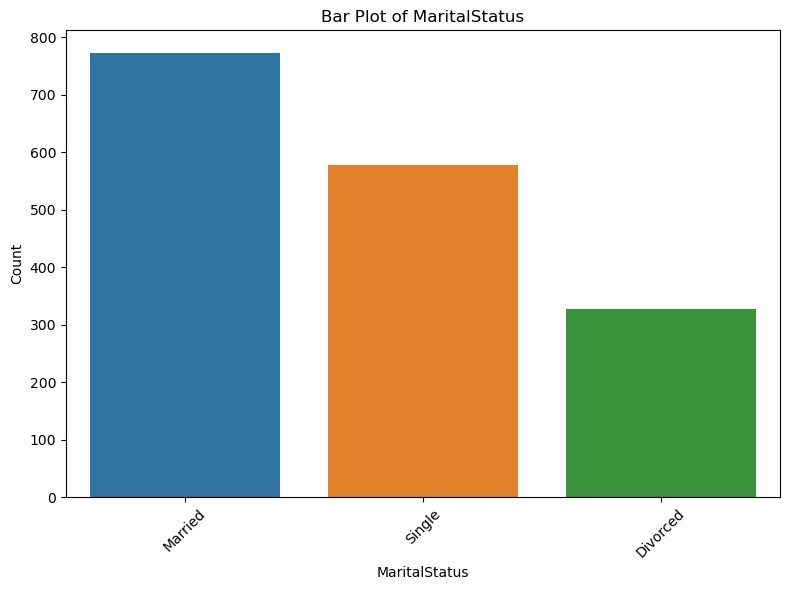

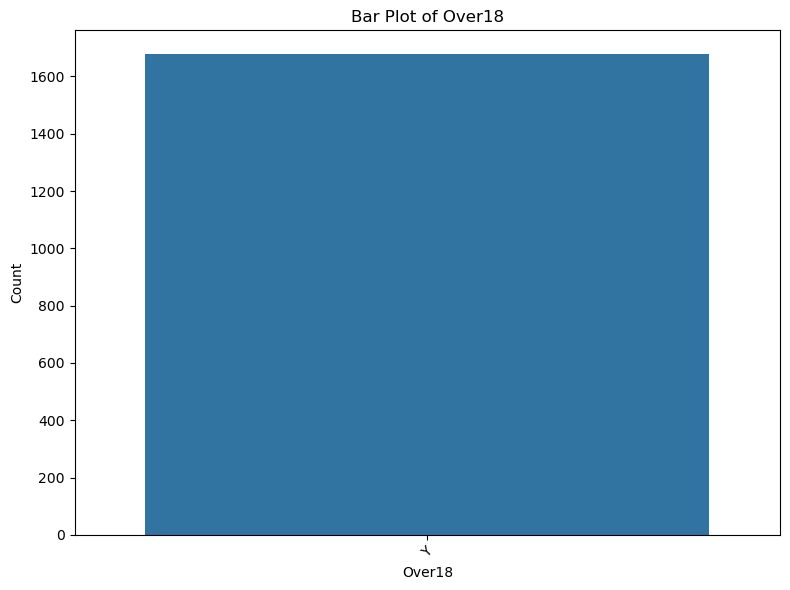

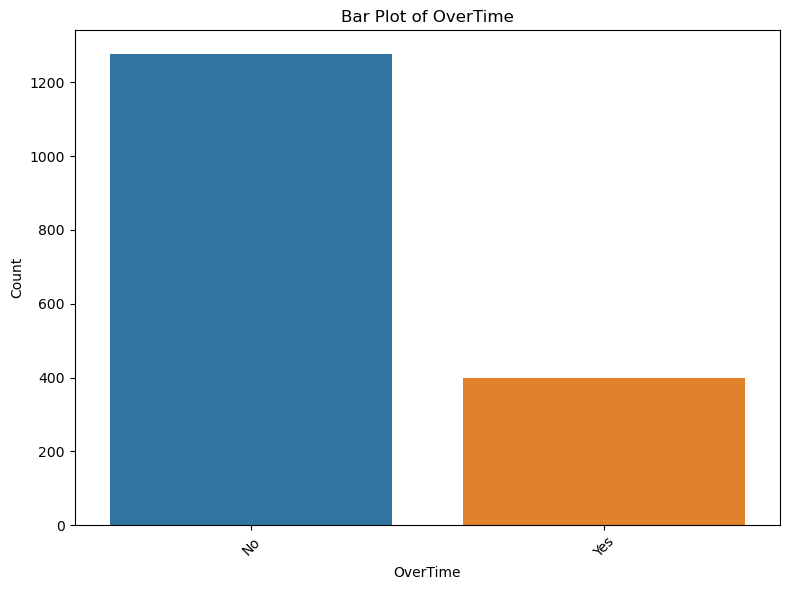

In [12]:




# Assuming your DataFrame is named 'train'
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Iterate through categorical columns and create separate bar plots
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # Count the occurrences of each unique value
    value_counts = train[col].value_counts()
    
    # Create the bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
